# Implement a simple deep neural network (DNN) for solving the polynomial equation 𝑦 = 5𝑥^3 − 10x^2 − 20𝑥 + 10 with the following specifications-

a)Use three hidden-layers of sizes 32, 64, and 128 and
display the generated DNN with the required number
of parameters.

b)Generate training samples within the range of -20 to
+20. Use an appropriate method for normalizing the
training data in the range of -1 to +1.

c)Use 5% of the samples as test data and 5% of the
samples as validation data and the rest of the data for
training the DNN with an appropriate number of
epochs.

d)Display the training accuracy vs validation accuracy
and training error vs validation error curves.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.preprocessing import MaxAbsScaler

# Creating DATASET and Normalizing the DATASET

In [2]:
# inputs
x = np.random.uniform(-20, 20, 10000)

# outputs
y = 5*x**3 - 10*x**2 - 20*x + 10

# Normalize the dataset
x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

# scaler = MaxAbsScaler()

# # Fit and transform the data
# x_data = scaler.fit_transform(x)
# y_data = scaler.fit_transform(y)

# Splitting the dataset into training, testing, and validation set

In [3]:
x_train, y_train = x_data[: int(len(x_data)*0.9)], y_data[: int(len(y_data)*0.9)]

x_val, y_val = x_data[int(len(x_data)*0.9) : int(len(x_data)*0.95)], y_data[int(len(y_data)*0.9) : int(len(y_data)*0.95)]

x_test, y_test = x_data[int(len(x_data)*0.95) : ], y_data[int(len(y_data)*0.95) : ]

# Plotting the dataset

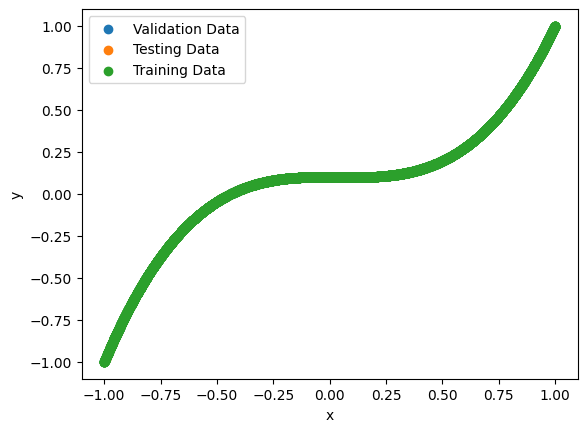

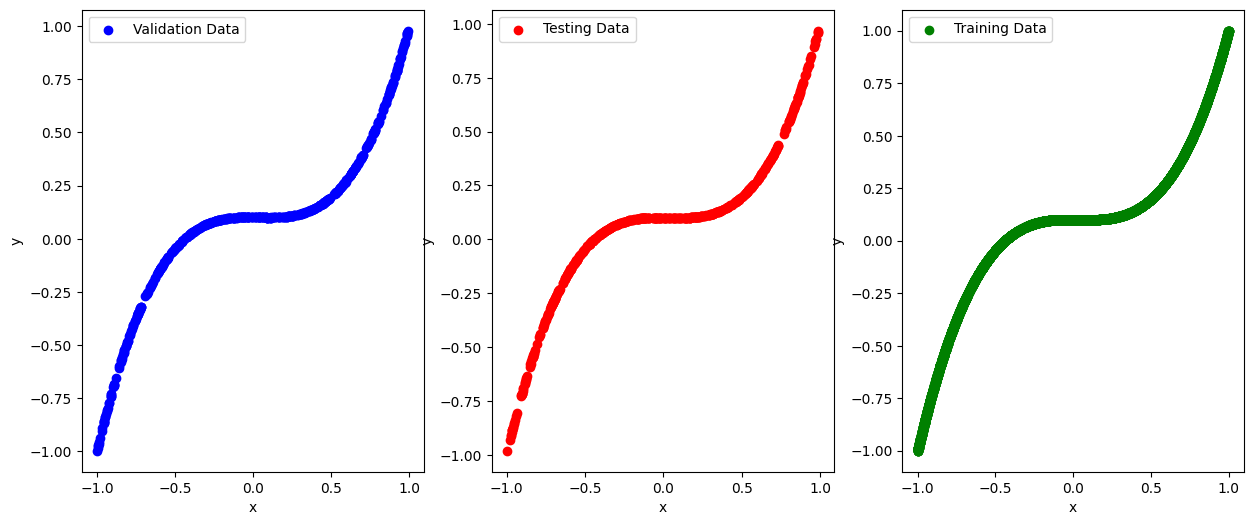

In [4]:
plt.scatter(x_val, y_val, label='Validation Data')
plt.scatter(x_test, y_test, label='Testing Data')
plt.scatter(x_train, y_train, label='Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.scatter(x_val, y_val, label='Validation Data', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(132)
plt.scatter(x_test, y_test, label='Testing Data', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(133)
plt.scatter(x_train, y_train, label='Training Data', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


plt.show()

# Building the DNN Model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

2025-01-26 14:59:52.152458: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-26 14:59:52.152966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 14:59:52.155316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-26 14:59:52.162862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737881992.174926   13591 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737881992.17

In [6]:
inputs = Input((1,))
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network")
model.summary()

2025-01-26 14:59:53.485689: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "Deep_Neural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model with loss function Mean Squared Error (MSE) and metrics R2Score:accuracy and optimizer used 'adam'

In [7]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")])
trained_model = model.fit(x_train, y_train, epochs = 10,  validation_data = (x_val, y_val))
history = trained_model.history

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8168 - loss: 0.0260 - val_accuracy: 0.9988 - val_loss: 1.8375e-04
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9991 - loss: 1.2408e-04 - val_accuracy: 0.9999 - val_loss: 2.1420e-05
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9998 - loss: 2.1552e-05 - val_accuracy: 0.9999 - val_loss: 1.6586e-05
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9999 - loss: 1.1733e-05 - val_accuracy: 0.9998 - val_loss: 2.6534e-05
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9999 - loss: 9.2029e-06 - val_accuracy: 1.0000 - val_loss: 5.3051e-06
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.8465e-06 - val_accuracy: 1.0000 - val_loss: 2.8399e-06
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 3.5441e-05 - val_accuracy: 0.9998 - val_loss: 3.6836e-05
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 7

# Plotting the training accuracy and validation accuracy

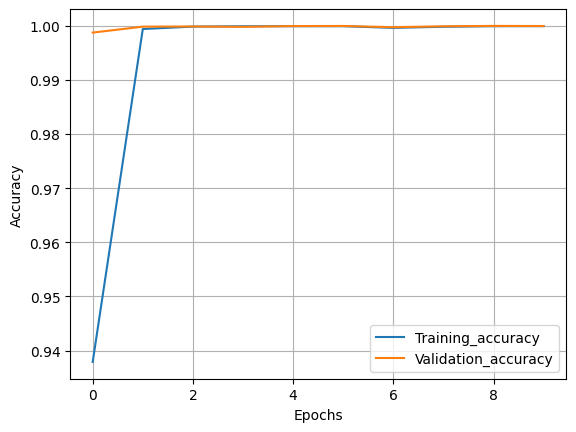

In [8]:
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_accuracy", "Validation_accuracy"])
plt.grid()
plt.show()

# Plotting the training loss and validation loss

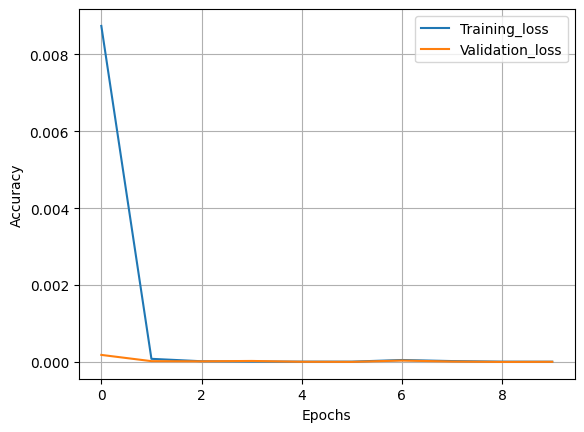

In [9]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()
plt.show()

# Evaluating the model


In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9922e-06 
Test Loss: 0.0000038
Test Accuracy: 99.99689%


# Predicting the values of y for test set of x

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


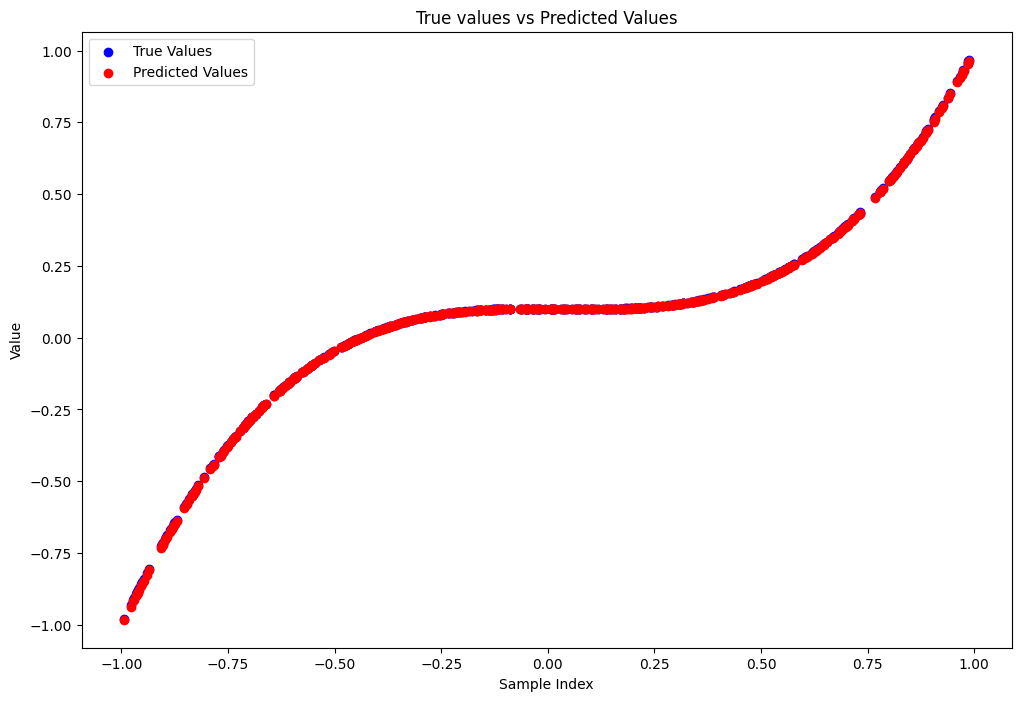

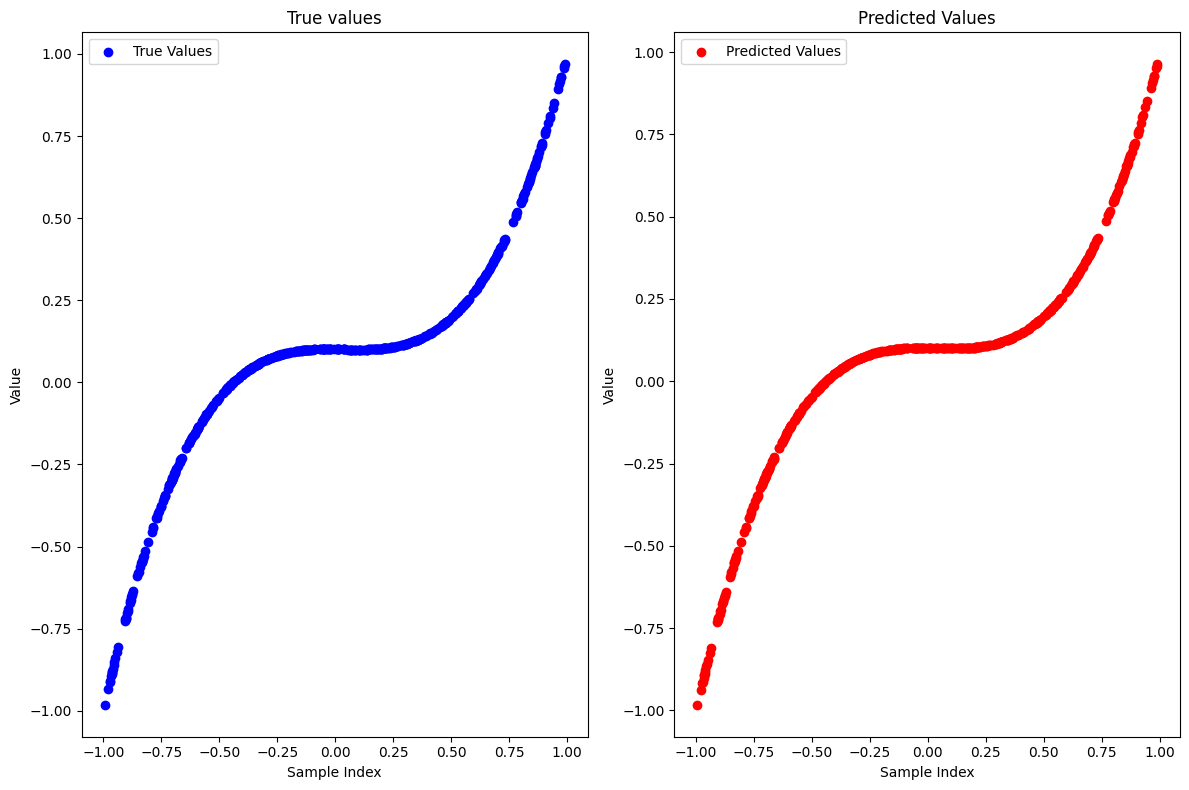

In [11]:
y_pred = model.predict(x_test)

plt.figure(figsize=(12, 8))
plt.scatter(x_test, y_test, label='True Values', color='blue')
plt.scatter(x_test, y_pred, label='Predicted Values', color='red')
plt.title('True values vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.scatter(x_test, y_test, label='True Values', color='blue')
plt.title('True values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(122)
plt.scatter(x_test, y_pred, label='Predicted Values', color='red')
plt.title('Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()